# 1. =의 의미


Equal 의 의미가 아니라 '입력' or '저장'이라고 이해하는게 좋다.

ex) A = 1 : ①A라는 변수를 만드는 동시에,
            ②A에 1이라는 숫자를 저장한다.

★ =의 오른쪽에 있는 것을 =의 왼쪽의 변수에 저장한다.

그러면,  1 = A라고 입력하면 어떻게 될까?

In [71]:
a = 1
print(a)

1


In [72]:
#1 = a

# 2. 함수

①이미 정해져 있는 함수(내장함수)들이 있다.

ex)
```
print()
input()
len()
```

②패키지/클래스에 저장된 함수(메서드)들이 있다.

ex)


```
.DataFrame()  #넘파이 행렬을 판다스 데이터프레임 형태로 변환하는 메서드
.array()    #데이터프레임 형태를 넘파이 행렬로 변환하는 메서드
```

③내가 만들수도 있다.

ex)


```
def MakingFullName(Dadname="민민규"):
  Kidname = input("아이의 이름을 입력하세요 : ")
  return Dadname[0]+Kidname
```





In [73]:
def MakingFullName(Dadname="민민규"):
  Kidname = input("아이의 이름을 입력하세요 : ")
  return Dadname[0]+Kidname

In [74]:
MakingFullName()

아이의 이름을 입력하세요 : 소율


'민소율'

# 3. 캘리포니아 지역 주택 가격 예측 모델

In [75]:
import os               #os 패키지
import tarfile          #압축 푸는 패키지
import urllib           #URL을 다루는 패키지

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close

#housing.tgz파일을 다운받고, 압축을 풀어 .csv 파일로 저장하는 함수를 정의

In [76]:
import pandas as pd         #판다스 dataframe 패키지
import numpy as np          #넘파이 행렬 패키지
import matplotlib as plt    #파이썬 visualization 패키지 (mathmatics plotting library?)

In [77]:
def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

#저장한 .csv 파일을 판다스 dataframe으로 읽어들이는 함수를 정의

In [78]:
fetch_housing_data()

#이 때 압축을 푼다. (함수 실행)

In [79]:
housing = load_housing_data()

#이 때 데이터를 불러온다. 불러온 데이터를 housing이라는 변수에 지정한다. (함수 실행)

In [80]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [81]:
housing.values

#housing이라는 데이터 프레임의 value(값)만 출력. 판다스 dataframe이 아닌 넘파이 array 구조임.

array([[-122.23, 37.88, 41.0, ..., 8.3252, 452600.0, 'NEAR BAY'],
       [-122.22, 37.86, 21.0, ..., 8.3014, 358500.0, 'NEAR BAY'],
       [-122.24, 37.85, 52.0, ..., 7.2574, 352100.0, 'NEAR BAY'],
       ...,
       [-121.22, 39.43, 17.0, ..., 1.7, 92300.0, 'INLAND'],
       [-121.32, 39.43, 18.0, ..., 1.8672, 84700.0, 'INLAND'],
       [-121.24, 39.37, 16.0, ..., 2.3886, 89400.0, 'INLAND']],
      dtype=object)

In [82]:
housing.info()

#각 열의 정보 요약. "어? total_bedrooms는 null값이 아닌 행의 갯수가 다르네?" "ocean_proximity 빼고 다 숫자형이네.. ocean_proximity는 무슨형태지?" 등의 인사이트를 얻자.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [83]:
housing["ocean_proximity"].value_counts()

#ocean_proximity 열의 value 당 갯수 표시. 이 열은 연속형이 아닌 범주형임을 확인할 수 있음

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [84]:
housing.describe()

#housing dataframe의 기술통계량 확인, 당연히 ocean_proximity는 범주형이므로 기술통계량에서 빠짐.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

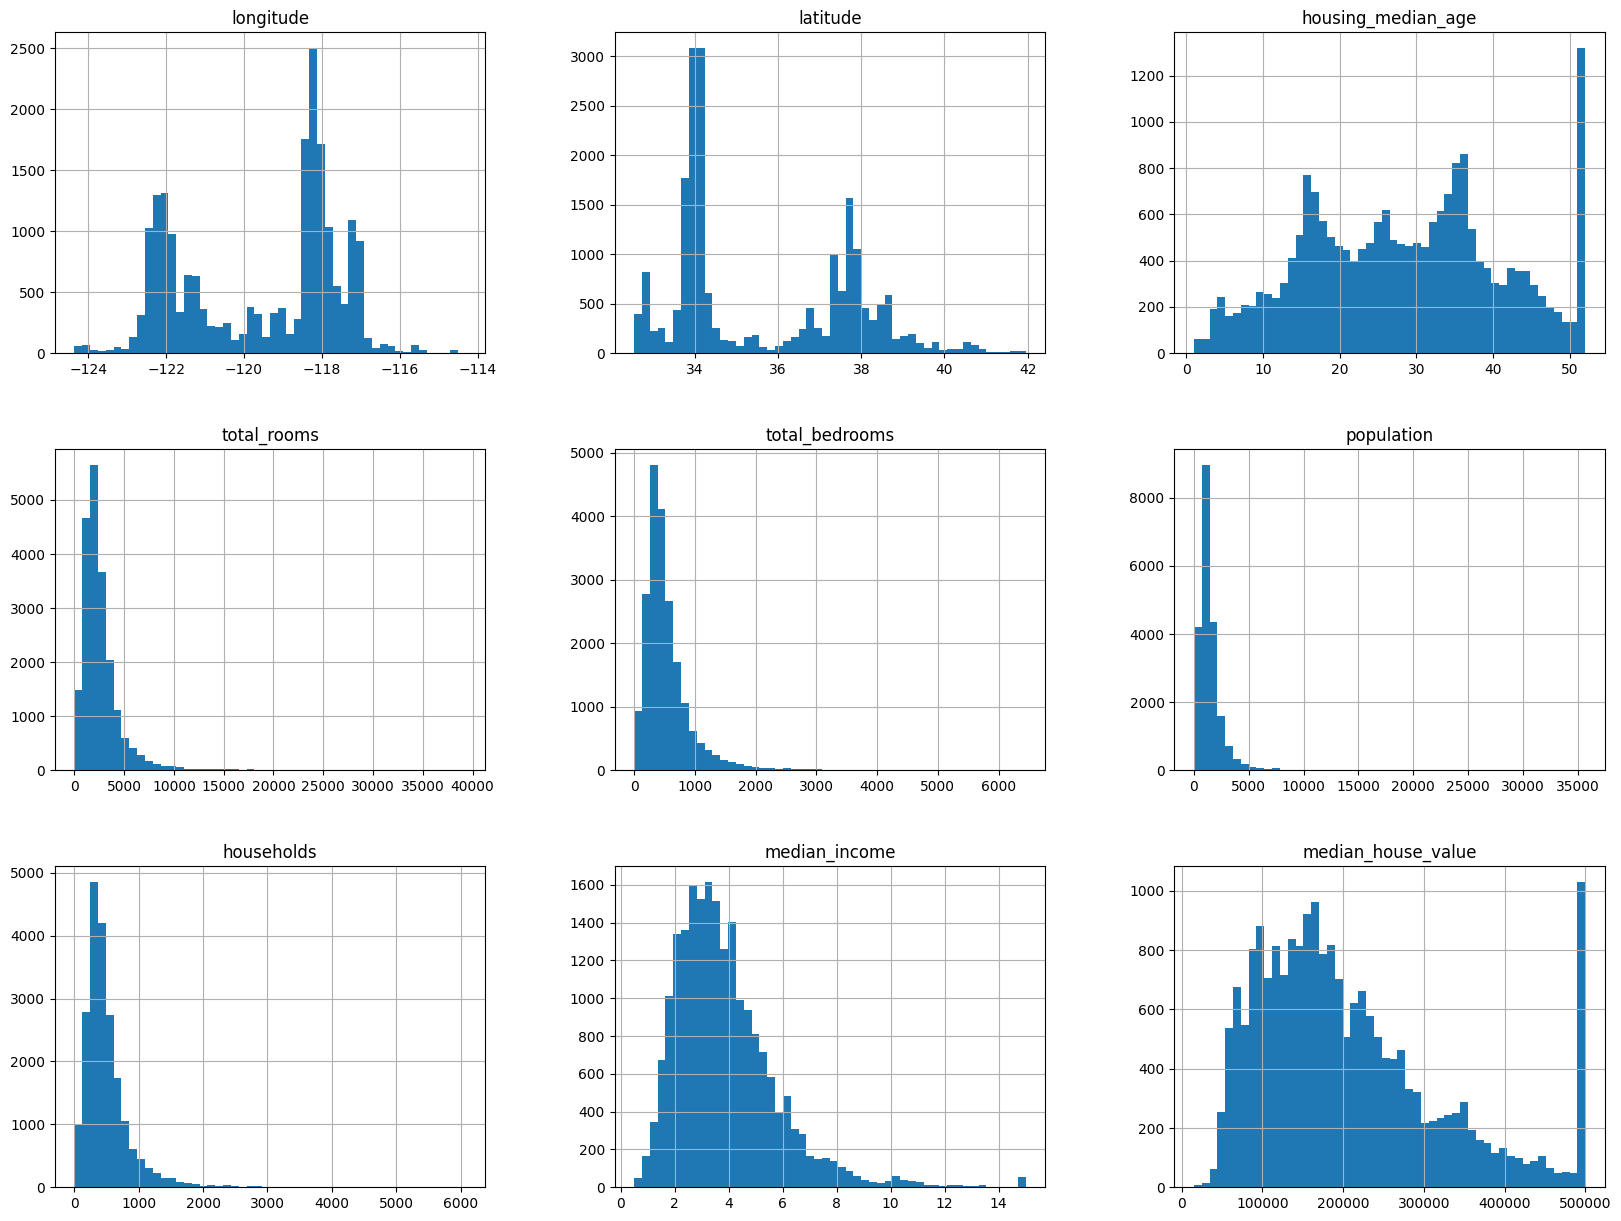

In [85]:
housing.hist(bins=50, figsize=(20,15))


히스토그램에서 확인할 것들.

1. median_income(중간소득)이 달러가 아님. (엔솔의 데이터의 경우 대부분 mm이고 데이터상 단위도 조회가 되는 경우가 있기 때문에 우리는 크게 신경쓸 부분이 아닙니다만, 참고하세요. 책에서는 중간소득 데이터를 최대 15, 최소 0.5로 조정해서 제공받았다고 합니다.)

2. housing_median_age(중간주택연도), median_house_value(중간주택가격)은 최댓값을 한정함.(실링두께 data와 같이 절벽이 형성됨) median_house_value(중간주택가격)은 타깃 속성, 즉 y값이 되기 때문에 심각한 문제가 될 수 있습니다. 예를들어, 예측값이 $500k 이상으로는 넘어가지 않도록 알고리즘이 학습될 수 있습니다. 이 경우 해결 방안은 두 가지입니다.



> a) 한곗값 밖의 구역에 대한 정확한 값을 구한다.



> b) 훈련 세트에서 해당 구역을 제거한다.(이렇게 할 경우 한곗값을 넘는 값에 대한 예측은 평가결과가 매우 나쁠 것이기 때문에 테스트세트에서도 제거한다고 써있네요)

3. 특성들의 스케일이 많이 다르다. (나중에 특성스케일링을 진행합니다. 어떤 머신러닝이든 특성스케일링은 모두 진행합니다.)

4. 많은 히스토그램이 좌측으로 치우쳐있음. (이것도 종 모양의 분포로 변형시킵니다.)

# ★★★★ 데이터를 더 깊게 들여다보기 전에 테스트세트를 따로 떼어놓아야 합니다. 그리고 테스트세트를 절대 들여다보면 안됩니다.★★★★
https://velog.velcdn.com/images/iguv/post/8ae842e3-f2b6-44c5-b7bf-a1f74b3a9124/image.png

In [86]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins = [0, 1.5, 3, 4.5, 6, np.inf],
                                labels = [1,2,3,4,5])     #이거 시험에 나왔음. 연속형 데이터를 구간을 나눠서 범주형으로 변환시키기

#많이 사용하는 훈련/테스트세트 분리 패키지입니다.

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) #'무작위'로 전체 중 20%를 테스트세트로 지정한다. random_state는 아무 숫자나 넣어도 됩니다.

<Axes: >

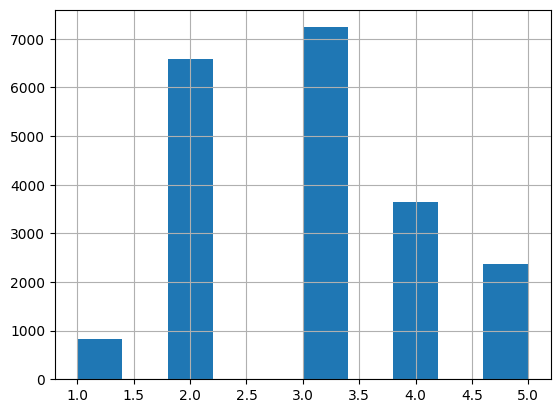

In [87]:
housing["income_cat"].hist()

<Axes: >

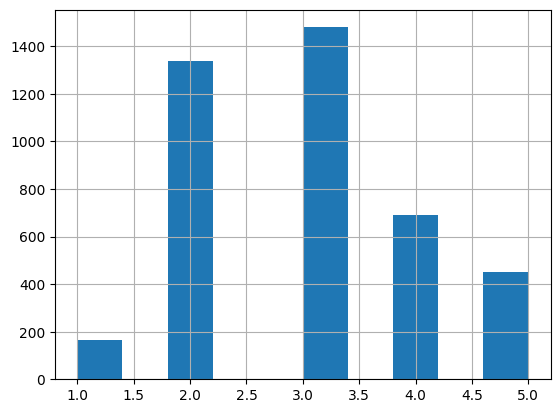

In [88]:
test_set["income_cat"].hist()

In [89]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [90]:
test_set['income_cat'].value_counts() / len(test_set)   #무작위로 샘플링하면 이렇게 전체 데이터와 다른(=편향된) 테스트세트가 형성됩니다.

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [91]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify = housing["income_cat"], random_state = 42)

#'계층샘플링'으로 전체 중 20%를 테스트세트로 지정한다. random_state는 아무 숫자나 넣어도 됩니다

In [92]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [93]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)   #잘 됐죠?

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [94]:
#income_cat 특성 삭제(훈련에 필요한게 아니니까)

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

# 데이터 탐색 및 시각화

In [95]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

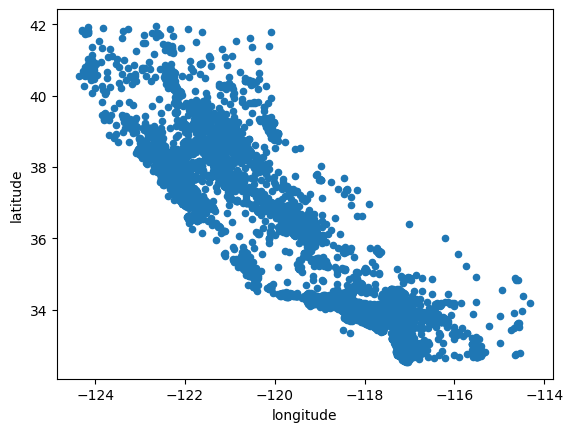

In [96]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

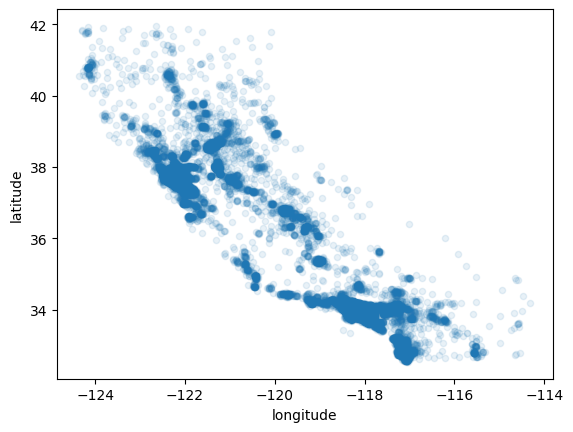

In [97]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

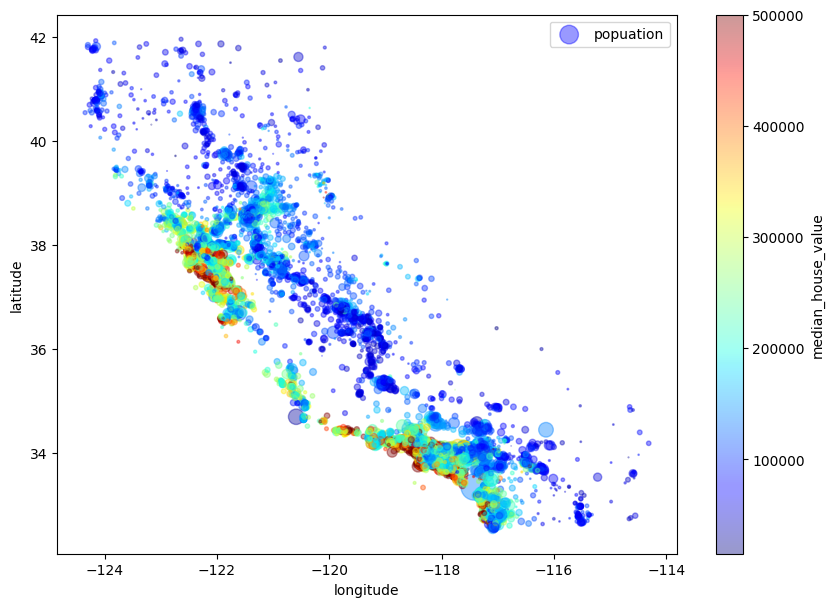

In [98]:
#더 예쁘게 해봅시다. 1.가격이 비싼거는 빨간색으로, 싸면 파란색으로. 2.해당 구역의 인구가 많으면 원이 크도록

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="popuation", figsize=(10,7),
             c="median_house_value", cmap="jet", colorbar=True,
             sharex=False)

In [99]:
corr_matrix = housing.corr()

<ipython-input-99-bac487469033>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


In [100]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [101]:
corr_matrix["median_house_value"].sort_values(ascending=False)  #중간주택가격과 상관성이 높은 특성들을 내림차순으로 정리. 오름차순으로 하려면?

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

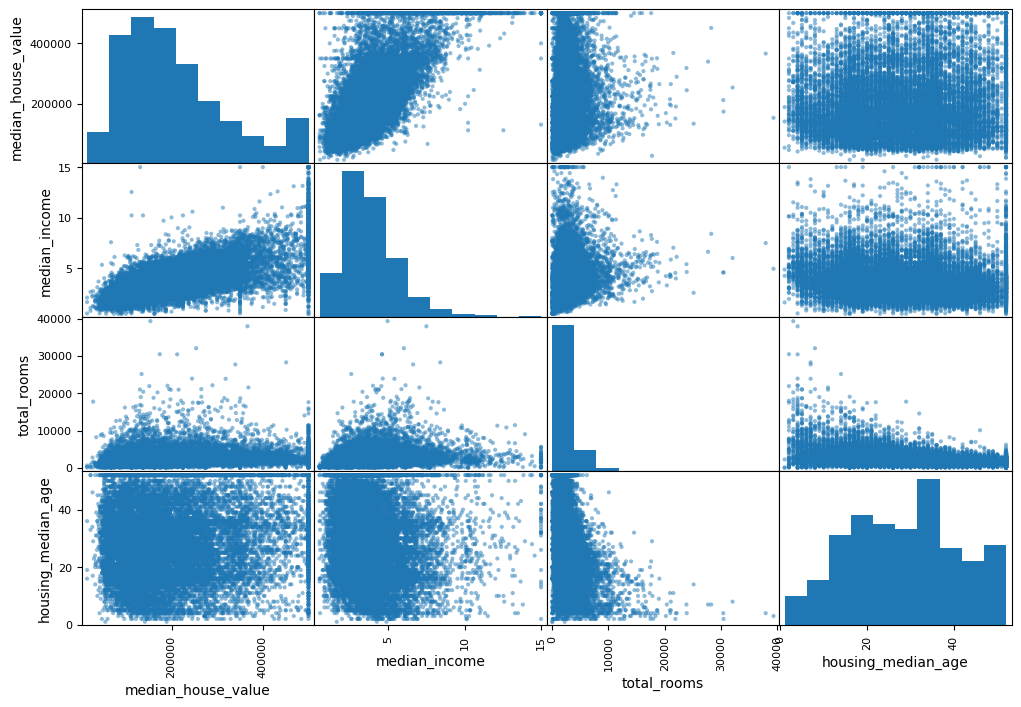

In [102]:
#산점도로 확인해봅시다.

from pandas.plotting import scatter_matrix


attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

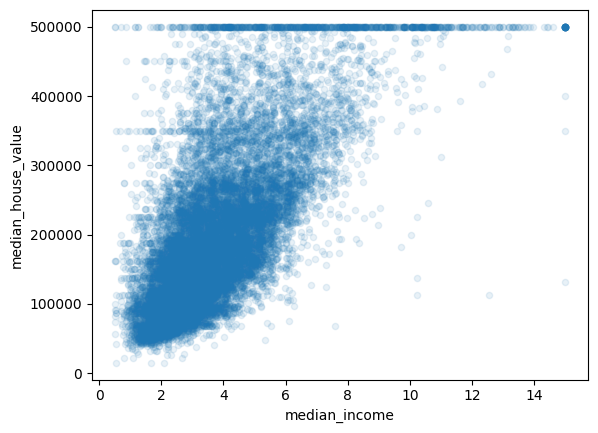

In [103]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

# 특성 조합하기


데이터를 탐색하고 통찰을 얻는 방법(데이터의 특성별 상황이 어떤지, 분포가 어떤지, 서로 상관관계가 어떤지)을 알아봤습니다.

충분한가요? 아직 아닙니다.

특성의 조합을 시도해봅시다. 이 과정은 각 특성의 '특징과 개념을 고려'(by domain knowledge)해서 적절히 조합을 시키겠다는 것이며, 머신러닝은 이걸 충분히 알아서 해주지 않습니다.

(이 과정은 정민님께서 절연 워크플로우에서 각 치수 특성끼리 관계식을 만들어서 새로운 특성을 만드는 과정과 동일합니다. )



①구역의 방 개수는 해당 구역에 얼마나 많은 집이 있는지 모른다면 유용하지 않음. --> 진짜 필요한 것 : 한 집에 방이 몇개?

②비슷하게, 구역의 침실 갯수는 유용하지 않음. --> 진짜 필요한 것 : 전체 방 중에 침실이 얼마나 되는지?

③한 집에 사는 사람 수도 중요할 듯.




In [104]:
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [105]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-105-2df75c723d39>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='population_per_household', ylabel='median_house_value'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='rooms_per_household', ylabel='median_income'>,
        <Axes: xlabel='population_per_household', ylabel='median_income'>,
        <Axes: xlabel='bedrooms_per_room', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='rooms_per_household'>,
        <Axes: xlabel='median_income', ylabel='rooms_per_household'>,
        <Axes: xlabel='rooms_per_household', ylabel='rooms_per_household'>,
        <Axes: xlabel='population_per_household', ylabel='ro

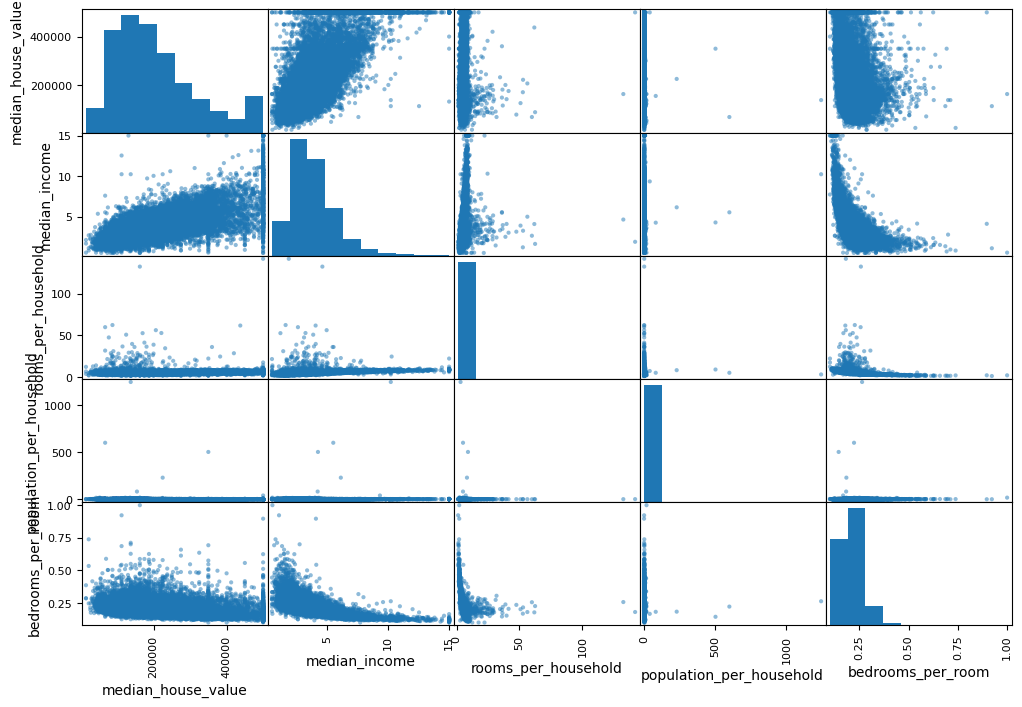

In [106]:
attributes = ["median_house_value", "median_income", "rooms_per_household",
              "population_per_household", "bedrooms_per_room"]

scatter_matrix(housing[attributes], figsize=(12,8))

# 머신러닝 알고리즘을 위한 데이터 준비

In [107]:
#데이터 준비 작업을 일일이 수동으로 하지 않고 함수로 만들 예정입니다.
#새로운 데이터가 들어오더라도 손쉽게 변환하기 위해   (like workflow)
#여러 데이터 변환 방법 중 무엇이 나은지 비교하기 위해..

In [36]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [108]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


**수치형 데이터 처리**

In [109]:
#total_bedrooms 특성 중 값이 없는 행 처리
#방법1:행 제거
#housing.dropna(subset=["total_bedrooms"])

#방법2:특성 컬럼(total_bedrooms) 삭제
#housing.drop("total_bedrooms", axis=1)

#방법3:어떤 값으로 채운다(0, 평균, 중간값 등)
#median = housing["total_bedrooms"].median()
#housing["total_bedrooms"].fillna(median, inplace=True)


In [110]:
#방법3을 사이킷런으로 하는 방법

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.drop("ocean_proximity", axis=1)   #SimpleImputer가 수치형 데이터에만 적용 가능하기 때문에 범주형 데이터는 빼줍니다.

imputer.fit(housing_num)    #fitting 진행. 데이터 기준으로 fitting(이 경우에는 중간값 도출)합니다.

imputer.statistics_     #각 특성(컬럼) 별 중간값이 어떻게 도출되었는지 봅시다.

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        1.79500000e+05,  5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [111]:
X = imputer.transform(housing_num)    #아까 fitting한 결과 기준으로 데이터를 변형(이 경우에는 누락값에 중간값 치환)

In [112]:
housing_num_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)     #변형된 결과가 넘파이 어레이 형식이라서.. 불편하지만 다시 판다스 데이터프레임 형태로 변환해줍니다.

**범주형 데이터 처리**

In [113]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [114]:
#대부분의 머신러닝 알고리즘은 숫자를 다루므로 위의 범주 데이터를 숫자로 변경하겠습니다. 먼저 사이킷런의 OrdinalEncoder. ★시험에 나옴

from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [115]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [116]:
#그런데, 머신러닝은 숫자를 인식할 때 가까운 숫자는 특성이 비슷하다고 인식합니다. 0과 1은 비슷, 0과 4는 다름.. 그런데 여기서는 0(<1H OCEAN)과 4(NEAR OCEAN)이 비슷합니다.
#만일 범주가 우리가 인식하기에 순차적인 값이라면(bad, average, good, excellent와 같이..) ordinalencoder를 사용해도 되겠습니다만 이 경우는 아닙니다.
#이럴 때는 카테고리별 이진 특성을 만들어 해결합니다. -> aka.원-핫 인코딩. 데이터가 0과 1로 표현된 피봇이라고 생각하면 됨.

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [117]:
#0과 1로 나눠서 표시하다보니, 특정 열은 1이고 나머지는 0으로만 되어있을테니 이걸 모두 저장하는게 비효율적이므로 1의 원소의 위치만 저장한 희소행렬(sparse matrix)로 표시합니다.
#0이 채워진 넘파이 배열로 표시해보죠.
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

# 나만의 변환기 만들기!

In [118]:
#아까 나왔던 특성 조합을 함수로 만드는 것입니다. 조금 어려우니 일단 참고만 하세요.


from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

    else:
      return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housinf_extra_attribs = attr_adder.transform(housing.values)

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                         ('attribs_adder', CombinedAttributesAdder()),
                         ('std_scaler', StandardScaler()),
                         ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [120]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [121]:
from sklearn.compose import ColumnTransformer


num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [133]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [134]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# 모델 선택과 훈련

In [55]:
#선형회귀를 해보겠습니다.

from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(housing_prepared, housing_labels)

LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

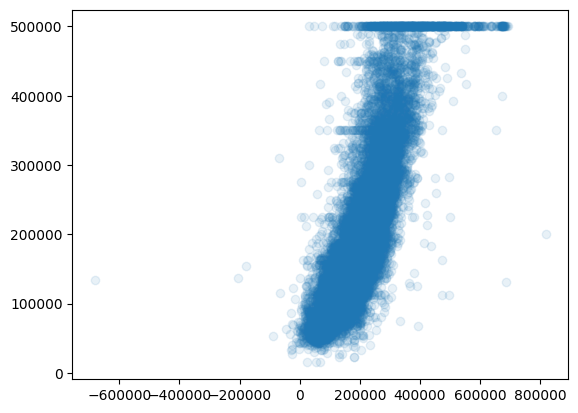

In [59]:
import matplotlib.pyplot as plt


train_XX = housing_prepared
train_YY = model_linear.predict(train_XX)
plt.scatter(train_YY,housing_labels, alpha = 0.1)
plt.show

In [60]:
#의사결정나무 모델을 적용해보겠습니다.

from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()
model_tree.fit(housing_prepared, housing_labels)


DecisionTreeRegressor()

<function matplotlib.pyplot.show(close=None, block=None)>

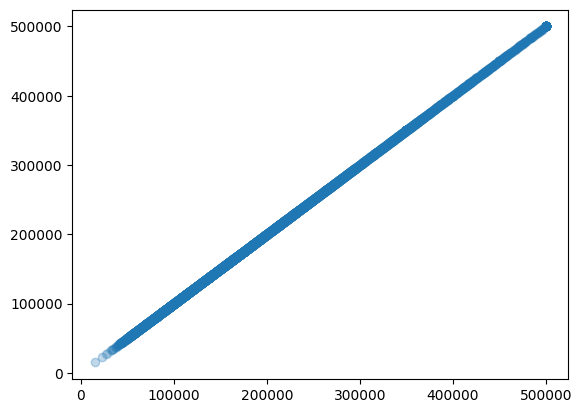

In [61]:
train_XX = housing_prepared
train_YY = model_tree.predict(train_XX)
plt.scatter(train_YY,housing_labels, alpha = 0.1)
plt.show


#과적합되어있습니다.

In [62]:
#랜덤포레스트 모델을 적용해보겠습니다.

from sklearn.ensemble import RandomForestRegressor

model_forest = RandomForestRegressor()
model_forest.fit(housing_prepared, housing_labels)


RandomForestRegressor()

<function matplotlib.pyplot.show(close=None, block=None)>

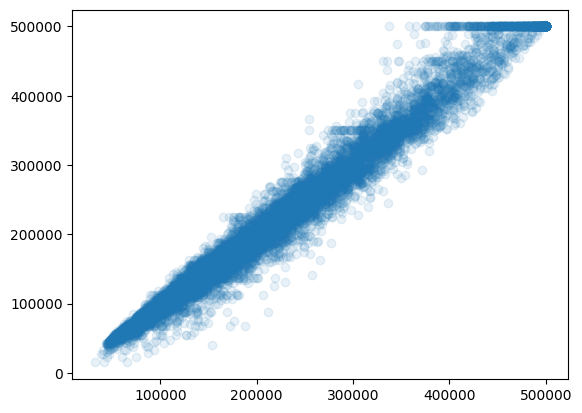

In [63]:
train_XX = housing_prepared
train_YY = model_forest.predict(train_XX)
plt.scatter(train_YY,housing_labels, alpha = 0.1)
plt.show

In [64]:
#인공신경망 모델을 적용해보겠습니다.

from sklearn.neural_network import MLPRegressor

model_MLP = MLPRegressor()
model_MLP.fit(housing_prepared, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

<function matplotlib.pyplot.show(close=None, block=None)>

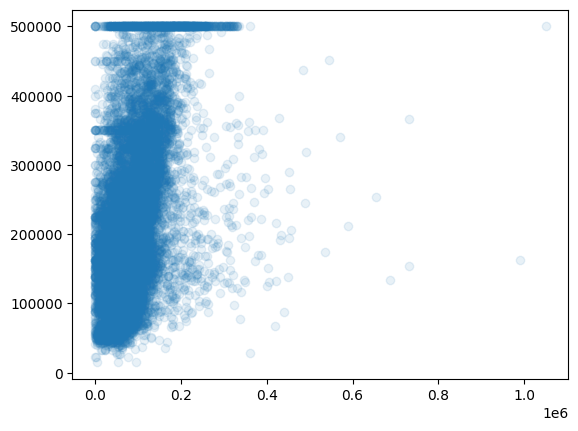

In [65]:
train_XX = housing_prepared
train_YY = model_MLP.predict(train_XX)
plt.scatter(train_YY,housing_labels, alpha = 0.1)
plt.show